
---

# Machine Learning with Python (Regression Problem)
*Author: RZ Wong*  
*Created May 2021*

#### Overview
1. Examine the dataset
2. Dealing with missing value
3. Feature Engineering
4. Split the dataset
5. Building Linear Regression model
6. Evaluate the model

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as ss
import math

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

## 1. Examine the dataset
This module work with the Automobile dataset.This data set has been used as a teaching example.  
The Autobobile dataset consist of data From 1985 Ward's Automotive Yearbook (Source: Kaggle https://www.kaggle.com/toramky/automobile-dataset).  
Our objective is to **predict the price** of an automobile. Thus, this is a regression problem because the output variable is a real or continuous value.

Now, you will load and examine this data. Download the .csv dataset from Kaggle source and import it  by `read_csv`.  
Execute the code in the cell below and examine the first few rows of the data frame.

In [2]:
# import data
auto_prices = pd.read_csv('automobile.csv')

In [3]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Notice there are both numeric and categorical features, and the label is a numerical variable.  

#### Numerical columns
First, check the statistical information of the numerial columns.

In [4]:
auto_prices.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


- The count, average, standard deviation, minimum, and maximum values are displayed.
- The quartiles are displayed, 25%, 50% (median), and 75%.  
For many of these columns, such as `curb_weight` and the label value, `price`, there is a significant difference between the mean and the median values. When the median values is less than the mean, this indicates that the distribution is skewed to the left.

#### Cetegorical columns
Now, you will consider how you can understand the distributions of categorical variables.  
Using a single line of Pandas code allows you to compute and display a **frequency table** using the `value_counts` method. A frequency table shows the frequency of each unique category of a categorical variable.  
  
The code in the cell prints frequency table for a list of categorical columns. Execute this code and examine the reuslts.

In [5]:
def count_unique(auto_prices, cols):
    for col in cols:
        print('\n' + 'For column: ' + col)
        print(auto_prices[col].value_counts())

cat_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels']
#            , 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
count_unique(auto_prices, cat_cols)


For column: make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

For column: fuel-type
gas       185
diesel     20
Name: fuel-type, dtype: int64

For column: aspiration
std      168
turbo     37
Name: aspiration, dtype: int64

For column: num-of-doors
four    114
two      89
?         2
Name: num-of-doors, dtype: int64

For column: body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

For column: drive-wheels
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


There are some basic facts you can derive from these frequency tables.
1. Some of these variables have a large number of categories. When performing machine learning with a limited size training dataset, having a large number of categories is problematic, since there will be few samples per category. For example, notice how many auto makes are represented. There is only 1 Mercury and 2 Isuze. Thus, any statistical property for these categories will be pooly determined.
2. There are significant imbalances in the counts of some categories. You have already seen that there are significant differences in the counts of autos by make. As another example, there are only 3 cars with rear engine autos. Again, any statistical property of rear engine cars will be poorly determined.

## 2. Dealing with missing value

1. How are missing values coded?
    - A NULL value or numeric missing value such as Nan.
    - A string number: -9999, 0, 'NA', '?', etc.

2. You must determine how to treat the missing values:
    - Remove features with substantial numbers of missing values. In many cases, such features are likely to have little information value.
    - Remove rows with missing values. If there are only a few rows with missing values it might be easier and more certain to simply remove them.
    - Impute values. Imputation can be done with simple algorithms such as replacing the missing values with the mean or median value. There are also comples statistical methods such as the expectation maximization (EM) or SMOTE algorithms.
    - Use nearest neighbor values. Alternatives for nearest neighbour values include, averaging, forward filling or backward filling.  
  
Carefully observe the first few cases from the data frame and notive that missing values are coded with a '?' character. Execute the code in the cell below to identify the columns with missing values.

In [6]:
(auto_prices.astype(np.object) == '?').any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

Execute the code in the cell below to display the data types of each column

In [7]:
auto_prices.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Compare the columns with missing values to their data types. In all cases, the columns with missing values have an `object` (character) type as a result of using the '?' code. As a result, some columns that should be numeric (bore, stroke, horsepower, peak-rpm, and price) are coded as `object`.  
  
The next question is how many missing values are in each of these `object` type columns?  
Execute the code in the cell below to display the counts of missing values.

In [8]:
for col in auto_prices.columns:
    if auto_prices[col].dtype == object:
        count = 0
        count = [count + 1 for x in auto_prices[col] if x == '?']
        print(col + ' ' + str(sum(count)))

normalized-losses 41
make 0
fuel-type 0
aspiration 0
num-of-doors 2
body-style 0
drive-wheels 0
engine-location 0
engine-type 0
num-of-cylinders 0
fuel-system 0
bore 4
stroke 4
horsepower 2
peak-rpm 2
price 4


The `normalize_losses` column has a significatn number of missing values and will be removed. Columns that should be numeric, but contain missing value, are processed in the following manner:
1. The '?' values are computed to Pandas Numpy using values `nan`.
2. Rows containing `nan` values are removed.
  
Execute the code, noticing the resulting shape of the data frame.

In [9]:
## Drop column with too many missing values
auto_prices.drop('normalized-losses', axis = 1, inplace = True)

## Remove rows with missing values, accounting for missing values coded as '?'
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']

for column in cols:
    auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)
auto_prices.shape

(195, 25)

The data set now contains 195 cases and 25 rows. 10 rows have been dropped by removing missing values.

### Transform column data type

As has been previously noted, there are five columns in this dataset which do not have the correct type as a result of missing values. This is a common because the '?' symbol cannot be recognize as a numeric type.



Execute the code in the cell below to convert the column data type from `str` to `float`.

In [10]:
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']

for column in cols:
    auto_prices[column] = auto_prices[column].astype(float)

## 3. Feature engineering
### Aggregating categorical variables

When a dataset contains categorical variables these need to be investigated to ensure that each category has sufficient samples. It is commonly the case that some categories may have few samples, or have so many similar categories as to be meaningless.  
  
  


As a specific case, you will examine the number of cylinders in the cars. Execute the code in the cell below to point a frequency table for this variables and examine the result.

In [11]:
auto_prices['num-of-cylinders'].value_counts()

four      155
six        24
five       10
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

Notice that there is only one car with three and twelve cylinders. There are four cars with eight cylinders, and 10 cars with five cylinders. It is likely that all of these categories will not have statistically significant difference in predicting auto price. It is clear that these categories need to be aggregated.  
  
  


The code in the cell below uses a Python dictionary to recode the number of cylinder categories into a smaller number categories. Execute this code and examine the resultsing frequency table.

In [12]:
cylinder_categories = {'three':'three_four', 'four':'three_four', 'five':'five_six', 
                       'six':'five_six', 'eight':'eight_twelve','twelve':'eight_twelve'}
auto_prices['num-of-cylinders'] = [cylinder_categories[x] for x in auto_prices['num-of-cylinders']]

In [13]:
auto_prices['num-of-cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num-of-cylinders, dtype: int64

There are now three categories. One of these categories only has five members. However, it is likely that these autos will have different pricing from others.  
  
Next, execute the code in the cell below to make the box plots of the new cylinder categories.

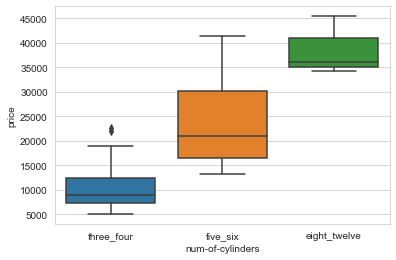

In [14]:
def plot_box(auto_prices, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=auto_prices)
    plt.xlabel(col) # set text for the x axis
    plt.ylabel(col_y) # set text for the y axis
    plt.show()
    
plot_box(auto_prices, 'num-of-cylinders')

Indeed, the price range of these categories is distinctive. It is likely that these new categories will be useful in predicting the price of autos.  
  
Now, execute the code in the cell below and examine the frequency table for the `body_style` feature.

In [15]:
auto_prices['body-style'].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64

Two of these categories have a limited number of cases. These categories can be aggregated to increase the number of cases using a similar approach as used for the number of cylinders. Execute the code in the cell below to aggregate these categories.

In [16]:
body_cats = {'sedan':'sedan', 'hatchback':'hatchback', 'wagon':'wagon',
            'hardtop':'hardtop_convert', 'convertible':'hardtop_convert'}
auto_prices['body-style'] = [body_cats[x] for x in auto_prices['body-style']]

In [17]:
auto_prices['body-style'].value_counts()

sedan              94
hatchback          63
wagon              24
hardtop_convert    14
Name: body-style, dtype: int64

To investigate if this aggregation of categories was a good idea, execute the code in the cell below to display a box plot.

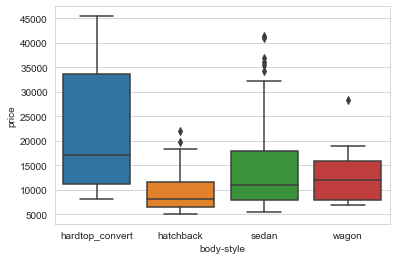

In [18]:
def box_plot(auto_prices, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=auto_prices)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y) # set text for y axis
    plt.show()

plot_box(auto_prices, 'body-style')

The `hardtop-convert` category does appear to have values distinct from the other body style.


---

### Transforming numeric variables

To improve performance of machine learning models transformation of the values are often applied.  
Typically, transformation are used to make the relationships between variables more linear. In other cases, transformation are performed to make distribution closer to Normal, or at least more symmetric. These transformation can include taking logarithms, exponential transformations and power transformations.
  
In this case, you will transform the label, the price of the car. Execute the code in the cell below to display and examine a histogram of the label.

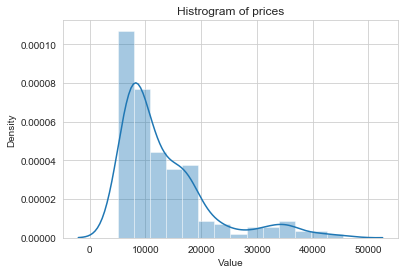

In [19]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histrogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
hist_plot(auto_prices['price'], 'prices')

The distribution of auto price is both quite skewed to the left and multimodal. Given the skew and the fast that there are no values less than or equal to zero, a log transformation might be appropriate.  
  
The code in the cell below displays a histogram of the logarithm of prices. Execute this code and examine the result.

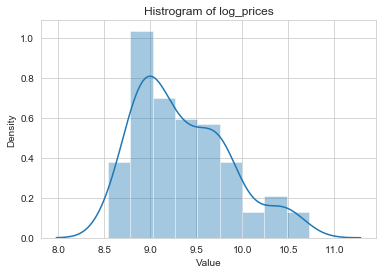

In [20]:
auto_prices['log_price'] = np.log(auto_prices['price'].astype(int))
hist_plot(auto_prices['log_price'], 'log_prices')

The distribution of the logarithm of price is more symmetric, but still shows some multimodal tendency and skew. Nonetheless, this is an improcement so we will use these values as out label.  
  
The next question is, how does this transformation change the relationship between the label and some of the features? To find out, execute the code in the cell below.


### Prepare the model matrix

All scikit-learn models require a numpy array of numetric only values for the features. The resulting array is often referred to as the *model matrix*.  
  
To create a model matrix from cases with both numetric and categorical variables requires two steps. First, the numeric features must be rescaled. Second, the categorical variables must be converted to a set of *dummy variables* to encode the presence or not of each cateogry.

### Create dummy variables from categorical features
  
Now, you must create dummy variables from the categorical features. Dummy variables encode categorical features as a set of binary variables. There is one dummy variable for each possible category. For each case all the values in the dummy variables are set to zero, except the one corresponding to the category value, which is set to one. In this way, a categorical vairable with any number of categories can be encoded as series of numeric features which scikit-learn can operate on. This process is referred to as **one hot encoding** since only one dummy variable is coded as 1 (hot) per case.  
  
The `sklearn.preprocessing` package contains functions to encode categorical features as dummy variables in two steps:
1. The categories are encoded as numbers starting with 0. For example, if there are 5 categories, they are encoded as the set [0, 1, 2, 3, 4].
2. The numeric categories are then encoded as dummy variables.  


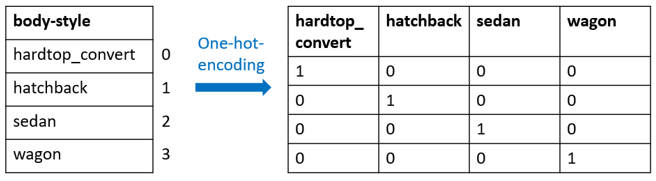

The following example will give you a feel for how this process works. The code in the cell below computes the numeric representation of the categories for the `body-style` feature by the following steps:
1. An encoder object is created using the `LabelEncoder` method.
2. The encoder is `fit` to the unique string values of the feature.
3. The `transformation` method then applies the numeric encoding to the original feature.  
  
Execute the code in the cell below and examine the result.

In [21]:
# check unique categories in body-style
print(auto_prices['body-style'].unique())

# create dummy variable (Features)
Features = auto_prices['body-style']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['hardtop_convert' 'hatchback' 'sedan' 'wagon']
[0 0 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 2 2 2 3 1 1 1 1 1 1 2 3 1
 1 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 1 2 2 2 3 0 2 2 0 2 0 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 3 2 1 2 3 0 1 2 2 3 2 1 1 1 2 2 3 3 2 2 3 3 2 2 2
 1 1 1 2 2 3 1 1 0 0 0 1 2 1 2 1 2 1 1 1 2 2 2 2 2 3 3 3 3 1 1 1 3 3 3 2 1
 2 1 2 1 2 2 1 2 1 0 0 1 0 1 0 2 2 1 2 1 1 1 2 3 2 2 2 2 2 2 2 0 1 2 2 3 2
 3 2 3 2 3 2 2 2 2 2]


Notice that this give original body style categories of this feature is now coded as integers in the set [0, 1, 2, 3, 4].  
  
For the next step in the process, the numerically coded categorical variable is converted to a set of dummy variables following these steps:
1. A one hot encoder object is created using the `OneHotEncoder` method from the `sklearn.preprocessing` module.
2. The numerically coded categorical feature is fit with the one hot encoder.
3. The dummy variables are encoded using the `transform` method on the encodings.  
  
Execute the code in the cell below and examine the results.

In [22]:
Features = Features.reshape(-1,1)

ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features)
Features = encoded.transform(Features).toarray()
Features[:10,:] # display top 10 rows

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

Notice that the `body-style` feature has been encoded as five columns. Each of these column is a dummy variable representing one category. Each row has one and only one dummy variable with a 1, and the rest 0s. This is the one hot encoding.  
  
Now, you need to one hot encode all given categorical variables and append them as columns to the model matrix with the scaled numeric variables. The code in the cell below executes a `for` loop that calls the `encode_string` function and uses the numpy `concatenate` function to add the dummy variables to the model matrix. The `encode_string` function uses the same process discussed above.

In [23]:
# all categorical variables
encode_string = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
                 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

Execute the code in the cell below to complete the one-hot-encoding for all categorical columns.

In [24]:
Dummy = pd.DataFrame()

for es in encode_string:
    # check unique categories
    unique = auto_prices[es].unique()
    print('For column: ' + es)
    print(unique) 
    
    # create dummy variables
    dummy = auto_prices[es]
    enc = preprocessing.LabelEncoder()
    enc.fit(dummy)
    dummy = enc.transform(dummy)
    # print(dummy)
    
    # one-hot-encoding
    dummy = dummy.reshape(-1,1)
    
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(dummy)
    dummy = encoded.transform(dummy).toarray()
    # print(dummy[:10,:])
    
    # concatenate the dummy variables to expand the features
    dummy = pd.DataFrame(dummy, columns = unique)
    Dummy = pd.concat([Dummy, dummy], axis=1)

For column: make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
For column: fuel-type
['gas' 'diesel']
For column: aspiration
['std' 'turbo']
For column: num-of-doors
['two' 'four' '?']
For column: body-style
['hardtop_convert' 'hatchback' 'sedan' 'wagon']
For column: drive-wheels
['rwd' 'fwd' '4wd']
For column: engine-location
['front' 'rear']
For column: engine-type
['dohc' 'ohcv' 'ohc' 'l' 'ohcf']
For column: num-of-cylinders
['three_four' 'five_six' 'eight_twelve']
For column: fuel-system
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' 'idi' 'spdi']


In [25]:
Dummy.head()

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,three_four,five_six,eight_twelve,mpfi,2bbl,mfi,1bbl,spfi,idi,spdi
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now we can feature engineer the original data.

In [26]:
# drop the categorical features
auto_new = auto_prices.drop(encode_string, axis=1)

# reset index to not generate NaN when concat, due to index not align
auto_new.reset_index(drop=True, inplace=True)
Dummy.reset_index(drop=True, inplace=True)

# add the new features
auto_new = pd.concat([auto_new, Dummy], axis=1)

In [27]:
auto_new.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,three_four,five_six,eight_twelve,mpfi,2bbl,mfi,1bbl,spfi,idi,spdi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


The data is now prepared to construct the Machine Learning model.


---

## 4. Split the dataset

With the model matrix constructed, you must now create randomly sampled training and test data sets.  
The code in the cell below uses the `train_test_split` function from the `sklean.model_selection` module to Bernoulli sample the cases in the original dataset into the two subsets. Since this data set is small only 40 cases will be included in the test dataset. Execute this code.

In [28]:
X = auto_new.drop(['price', 'log_price'], axis = 1)
y = auto_new['log_price']

## Randomly sample cases to create independent training and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 40, random_state=9988)

### Rescale numeric features

Numeric features must be rescaled so they have a similar range of values. Rescaling present features from having an undue influence on model training simply because they have a large range of numeric variables.  
  
The code in the cell below uses the `StandardScaler` function from the `sklearn.preprocessing` package to Zscore scale the numeric features. Notice that the scaler is fit only on the training data. The training scaler is these applied to the test data. Test data should always be scaled using the parameters from the training data.  
  
Execute this code.

In [29]:
x_train = x_train.values
x_test = x_test.values

scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
x_train[:,14:] = scaler.transform(x_train[:,14:])
x_test[:,14:] = scaler.transform(x_test[:,14:])
x_train[:2,14:]

array([[-0.11433239, -0.18257419, -0.21747942, -0.14048787, -0.24828177,
        -0.26261287, -0.11433239, -0.11433239, -0.26261287, -0.20067002,
        -0.0805823 , -0.28968273, -0.30257114, -0.24828177, -0.16275769,
        -0.14048787, -0.20067002, -0.23328474,  2.22745111, -0.24828177,
        -0.23328474,  2.94745653, -2.94745653,  0.47974861, -0.47974861,
        -0.11433239,  0.90748521, -0.88408664, -0.28968273, -0.71053105,
         1.07367489, -0.3737725 , -0.18257419,  0.81649658, -0.76264845,
         0.14048787, -0.14048787, -0.26261287, -0.26261287,  0.57983351,
        -0.2763854 , -0.23328474, -0.14048787, -0.46954493,  0.5       ,
        -0.24828177, -0.6799001 ,  2.94745653, -0.0805823 , -0.93138063,
        -0.21747942, -0.0805823 ],
       [-0.11433239, -0.18257419, -0.21747942, -0.14048787, -0.24828177,
        -0.26261287, -0.11433239, -0.11433239, -0.26261287, -0.20067002,
        -0.0805823 , -0.28968273, -0.30257114, -0.24828177, -0.16275769,
        -0.14048

You can see that the numeric features have been rescaled are required.


---

## 5. Construct the linear regression model

With data prepared and split into training and test subsets, you will now compute the linear regression model. There are 28 features, so the model will require at least 28 coefficients.  
The equation for such a **multiple regression** problem can be written as:

$y=f(x)=Px+b$  
$y=P1x1+P2x2+...+Pnxn+b$
  
where:  
$y$ are the predicted values or scores.  
$x$ is the vector of feature values with components {x1, x2,...,xn  
$P$ is vector of model coefficients with components {P1, P2,...,Pn  
$b$ is the intercept term, if there is one.  
  
You can think of the linear regression function $f(x)$ as the dor product between the beta vector $P$ and the feature vector $x$, plus the intercept term $b$.  
  
The code in the cell below uses the `sklearn import linear_model` to compute a least squares linear model as follow:  
  
1. A linear regression model object is created with the `LinearRegression` method. Notice, that in this case, no intercept will be fit. The intercept value or **blas** will be accommodated in the coefficients of the dummy variables for the vategorical features.
2. The model is fir using the `fit` method with the numpy array of features and the label.  
  
Execute this code.

In [30]:
from sklearn.linear_model import LinearRegression

## define and fir the linear regression model
lin_mod = LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

The model has been fit to the training data. Execute the code in the cell below to examine the value of the intercept term and coefficient.

In [31]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 3.94611213e-03  1.44962599e-02 -9.98444787e-03  1.05780966e-01
  3.09351606e-03  6.97403198e-04 -4.09417473e-04  2.33206287e-02
 -1.31032514e-02 -3.28745056e-03  3.57372746e-04  1.14586058e-04
 -1.54594263e-02  1.80872447e-02  6.34415301e-02  1.99499174e-02
  1.22079990e-01  6.79310216e-03 -3.25878481e-03  2.13922152e-02
  1.71002094e-02 -1.94417157e-02  1.73500136e-02 -4.80462349e-02
 -1.83367027e-02 -2.65391993e-02  4.33932732e-02 -1.82550559e-01
 -6.57524794e-03  4.08742070e-02  2.20204101e-02 -1.07711813e-02
  3.47782694e-03  1.17271401e-02 -3.37421976e-02  7.40419632e-03
 -7.40419632e-03 -2.27894971e-02  2.27894971e-02 -3.43718829e-03
  5.89265436e-03 -5.12784530e-03  2.18249984e-02 -1.25985766e-03
  6.31911191e-03 -2.55815124e-02 -3.06682171e-03 -1.10510602e-02
  1.23514473e-02 -4.08742070e-02  4.08742070e-02 -3.70927612e-03
  7.22771700e-02 -1.70558877e-02  1.26498994e-02 -5.73663653e-02
  4.98748059e-02 -2.13333671e-02  3.34066663e-03 -1.22888589e-02
 -6.91070772e-03  7.4

As expected, the intercept term is `0.0`. Roughly speaking, you can interpret the coefficients of the model as follow:  
1. The price of autos increases with weight (first coefficient), horsepower (second coefficient) and weakly decrease with fuel efficiency (third coefficient).
2. The coefficients for the dummy variables are in a similar range, indicating the bias or intercept has been incorporated in these.

## 6. Evaluate the model

You will now use the test dataset to evaluate the performance of the regression model. As a first step, execute the code in the cell below to compute and display various performance metrics and examine the results.

In [32]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1-r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

y_score = lin_mod.predict(x_test)
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.02457751023554746
Root Mean Square Error = 0.15677216026944152
Mean Absolute Error    = 0.11489973893039318
Median Absolute Error  = 0.09397169247975601
R^2                    = 0.9148430478117309
Adjusted R^2           = 0.7232399053881253


At first glance, these metrics look promising. The RMSE, MAE and median absolute error are all small and in a similar range. However, notice that the R2 and R2adj are rather different. This model has a large number of parameters compared to the number of cases available. This result indicates that the model may be overfit and might not generalize well.  
  
To continue the evaluation of the model performance, execute the code in the cell below to display a histogram of the residuals.

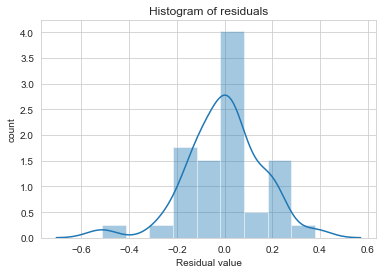

In [33]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals.
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test.values, y_score)

This histogram shows that the residuals are in a small range. However, there is some noticeable skew in the distribution.  
  
Next, execute the code in the cell below to display the Q-Q Normal plot.

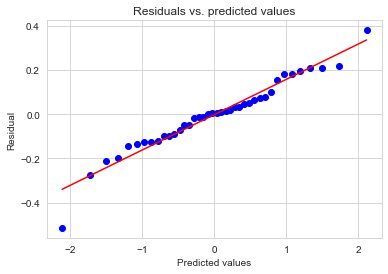

In [34]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals.
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test.values, y_score)

As with the histogram, the Q-Q Normal plot indicates the residuals are close to Normality distributed, show some skew (deviation from the straight line). This is particularly for large residuals.  
  
There is one more diagnostic plot. Execute the code in the cell below to display the plot of residuals vs. predicted values.

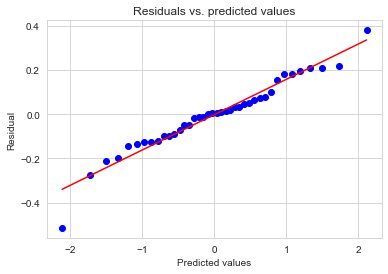

In [35]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals.
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test.values, y_score)    

This plot looks reasonable. The residual values appear to have a fairly constant dispersion as the predicted value changes. A few large residuals are noticeable, particularly on the positive side.  
  
But wait! This residual plot is for the log of the auto price. What does the plot look like when transformed to real prices? Execute the code in the cell below to find out.

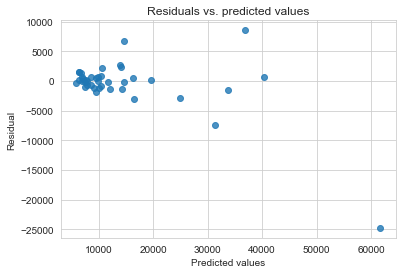

In [36]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test.values)
resid_plot(y_test_untransform, y_score_untransform)

Notice that the untransformed residuals show a definite trend. The dispersion of the residuals has a cone-like pattern increasing to the right. The regression model seems to do a good job of prediction the price of low cost cars, but becomes progressively worse as the price of the car increases.